Populating the interactive namespace from numpy and matplotlib


C:\Users\omoto\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid', 'test', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


KeyboardInterrupt: 

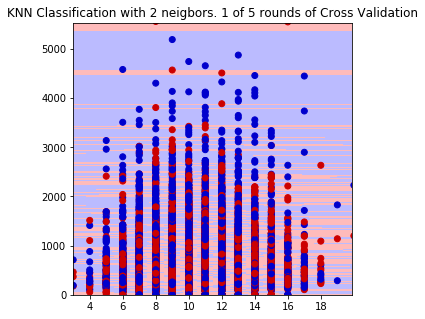

In [60]:
%pylab inline
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
df = pd.read_csv("OnlineNewsPopularityCleaned.csv")
data = df.as_matrix()
X = data[:,0:-2]
y = data[:,-1]

cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])

h = 0.1  # step size in the mesh

# Points in a mesh of [x_min, m_max] x [y_min, y_max]




no_of_classes = len(unique(y))
cv = KFold(n_splits=5, shuffle=True)  # 5-fold cross-validation

# plt.figure(figsize=(5,5))
for k,(train, test) in enumerate(cv.split(X)):
    x_min, x_max = X[test,0].min()-1, X[test,0].max()+1
    y_min, y_max = X[test,1].min()-1, X[test,1].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    clf = neighbors.KNeighborsClassifier(n_neighbors=no_of_classes,weights= "distance")
    clf.fit(X[train,:2],y[train])
    ypred=clf.predict(grid)
#     print (k, ':\t', (y[test]==ypred).sum() / float(test.size),
#         '\t=', clf.score(X[test],y[test]) )
    ypred = ypred.reshape(xx.shape)
    plt.figure(figsize=(5,5))

    plt.pcolormesh(xx, yy, ypred, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[train,0], X[train,1], c=y[train], cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("KNN Classification with %i neigbors. %i of %i rounds of Cross Validation"
              
              % (no_of_classes, k+1, 5))

Cross Validation Avg =  0.584213667561922


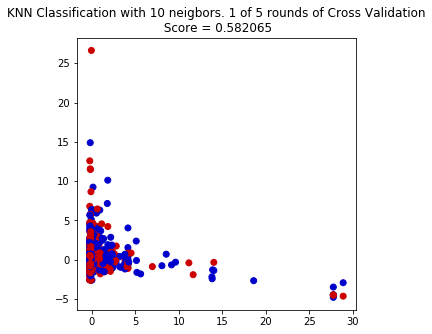

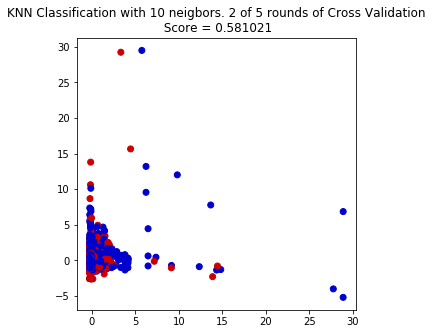

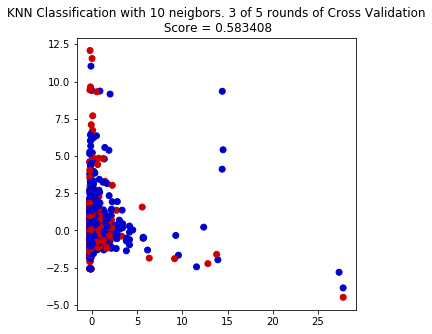

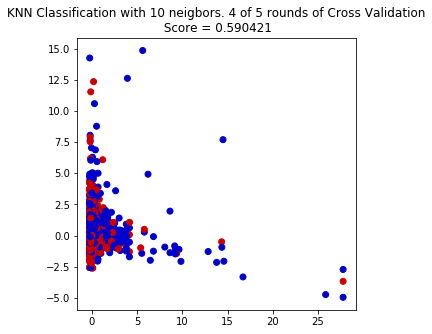

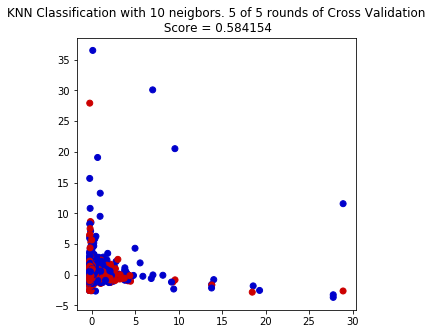

In [79]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=4, whiten=True)
X = data[:,0:-2]
y = data[:,-1]
X = pca.fit_transform(X)
no_of_classes = len(unique(y))
no_of_classes = 10
splits = 5
cv = KFold(n_splits=splits, shuffle=True)  # 5-fold cross-validation

# X=X[:,:2]

# plt.figure(figsize=(5,5))

clf_score_sum = 0
for k,(train, test) in enumerate(cv.split(X)):
    clf = neighbors.KNeighborsClassifier(n_neighbors=no_of_classes)
    clf.fit(X[train],y[train])
    ypred=clf.predict(X[test])
#     print (k, ':\t', (y[test]==ypred).sum() / float(test.size),
#         '\t=', clf.score(X[test],y[test]) )

    plt.figure(figsize=(5,5))
    score = (clf.score(X[test],y[test]))
    clf_score_sum+=score


    # Plot also the training points
    plt.scatter(X[test,0], X[test,1], c=y[test], cmap=cmap_bold)
    plt.title("KNN Classification with %i neigbors. %i of %i rounds of Cross Validation\n Score = %g"
              
              % (no_of_classes, k+1, 5,score))

clf_score_avg = clf_score_sum/splits

print("Cross Validation Avg = ",clf_score_avg)
    
    


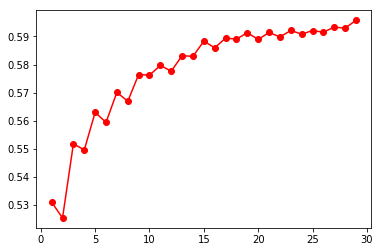

In [78]:

from sklearn import decomposition
pca = decomposition.PCA(n_components=2, whiten=True)

X = pca.fit_transform(X)
scores = dict()    # Create a dictionary
for train, test in cv.split(X):
    for k in range(1,30):
        if k not in scores: scores[k] = []   # Make sure we don't override what's already created
        knn = neighbors.KNeighborsClassifier(n_neighbors=k)
        knn.fit(X[train],y[train])
        s = knn.score(X[test], y[test])
        scores[k].append(s)

klist, mlist = [], []
for k in scores:
    klist.append(k)
    mlist.append(np.mean(scores[k]))
plt.plot(klist,mlist,'or-');